In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

In [6]:
engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

ed_df = pd.read_sql_query('select * from useducation',con=engine2)

In [7]:
ed_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [8]:
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

In [9]:
# first remove nulls 
# will fill with mean for the columns 
# fill all floats with mean of total dataset
for column_name in ed_df.columns:
    if ed_df[column_name].dtype in ('float64',):
       ed_df[column_name].fillna(ed_df[column_name].mean(), inplace=True)

In [10]:
ed_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.661132
1,1992_ALASKA,ALASKA,1992,915930.820993,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,234.768293,278.414711,218.866154,258.859712
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.661132


In [11]:
# calculate average score  4th grade students * 4 score + 8th students* 8 th score /4th students + 8th students
ed_df["avg_score"] = (ed_df["GRADES_4_G"] * ed_df["AVG_MATH_4_SCORE"]  + ed_df["GRADES_8_G"] *  ed_df["AVG_MATH_8_SCORE"])/(ed_df["GRADES_4_G"] + ed_df["GRADES_8_G"])

In [12]:
ed_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_score
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.661132,230.272259
1,1992_ALASKA,ALASKA,1992,915930.820993,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,79117.0,30847.0,112335.0,234.768293,278.414711,218.866154,258.859712,255.462492
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,238.787277
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,233.709070
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.661132,232.794841


In [13]:

ed_df["avg_score2"] = (ed_df["GRADES_4_G"] * ed_df["AVG_READING_4_SCORE"]  + ed_df["GRADES_8_G"] *  ed_df["AVG_READING_8_SCORE"])/(ed_df["GRADES_4_G"] + ed_df["GRADES_8_G"])

In [14]:
ed_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_score,avg_score2
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.661132,230.272259,235.830815
1,1992_ALASKA,ALASKA,1992,915930.820993,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,79117.0,30847.0,112335.0,234.768293,278.414711,218.866154,258.859712,255.462492,237.828412
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,238.787277,232.490863
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,233.709070,237.173496
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.661132,232.794841,227.854186


In [15]:
ed_df["avg_mr_score"]= (ed_df["avg_score"] + ed_df["avg_score2"])/2

In [16]:
ed_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_score,avg_score2,avg_mr_score
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.661132,230.272259,235.830815,233.051537
1,1992_ALASKA,ALASKA,1992,915930.820993,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,79117.0,30847.0,112335.0,234.768293,278.414711,218.866154,258.859712,255.462492,237.828412,246.645452
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,238.787277,232.490863,235.639070
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,233.709070,237.173496,235.441283
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.661132,232.794841,227.854186,230.324513


In [18]:
ed_df.iloc[:,3:].corr()

,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,...,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_score,avg_score2,avg_mr_score
ENROLL,1.000000,0.907628,0.888930,0.907463,0.841166,0.908580,0.874647,0.910445,0.953080,0.913021,...,0.930928,0.931951,0.926712,-0.001849,-0.019258,-0.036480,-0.003954,-0.019049,-0.040098,-0.028472
TOTAL_REVENUE,0.907628,1.000000,0.928324,0.972590,0.964969,0.999024,0.990375,0.994848,0.940359,0.924618,...,0.833155,0.859477,0.832470,0.102492,0.069315,0.040925,0.010860,0.084319,0.035251,0.071503
FEDERAL_REVENUE,0.888930,0.928324,1.000000,0.920741,0.848877,0.928646,0.893734,0.931638,0.942312,0.907751,...,0.820012,0.848976,0.821315,0.079385,0.027640,-0.026565,0.004642,0.051857,-0.015112,0.029872
STATE_REVENUE,0.907463,0.972590,0.920741,1.000000,0.880126,0.970056,0.954485,0.968782,0.943215,0.914944,...,0.835196,0.862385,0.828996,0.078731,0.043171,0.005163,0.008979,0.059710,0.010221,0.044984
LOCAL_REVENUE,0.841166,0.964969,0.848877,0.880126,1.000000,0.965373,0.969880,0.957090,0.863986,0.866066,...,0.769090,0.791938,0.773618,0.123374,0.099065,0.087996,0.013217,0.109425,0.068335,0.101452
TOTAL_EXPENDITURE,0.908580,0.999024,0.928646,0.970056,0.965373,1.000000,0.991347,0.993314,0.939463,0.932447,...,0.835844,0.862089,0.835768,0.099858,0.067273,0.038837,0.012255,0.082041,0.034697,0.069725
INSTRUCTION_EXPENDITURE,0.874647,0.990375,0.893734,0.954485,0.969880,0.991347,1.000000,0.976889,0.902964,0.896103,...,0.802880,0.828842,0.803033,0.100673,0.069862,0.051598,0.017052,0.083877,0.046333,0.075448
SUPPORT_SERVICES_EXPENDITURE,0.910445,0.994848,0.931638,0.968782,0.957090,0.993314,0.976889,1.000000,0.945724,0.917782,...,0.838136,0.865356,0.836553,0.106002,0.071857,0.040064,0.009735,0.087214,0.033865,0.072963
OTHER_EXPENDITURE,0.953080,0.940359,0.942312,0.943215,0.863986,0.939463,0.902964,0.945724,1.000000,0.916854,...,0.868762,0.887414,0.864427,0.044813,0.009514,-0.015002,0.005219,0.022639,-0.012505,0.010777
CAPITAL_OUTLAY_EXPENDITURE,0.913021,0.924618,0.907751,0.914944,0.866066,0.932447,0.896103,0.917782,0.916854,1.000000,...,0.850573,0.868413,0.856313,0.064987,0.029212,-0.014501,0.001522,0.043743,-0.011944,0.025506


In [19]:
# INSTRUCTION_EXPENDITURE and SUPPORT_SERVICES_EXPENDITURE is mostly related with new score variable 
# pca for the expenditure types 
from sklearn.decomposition import PCA

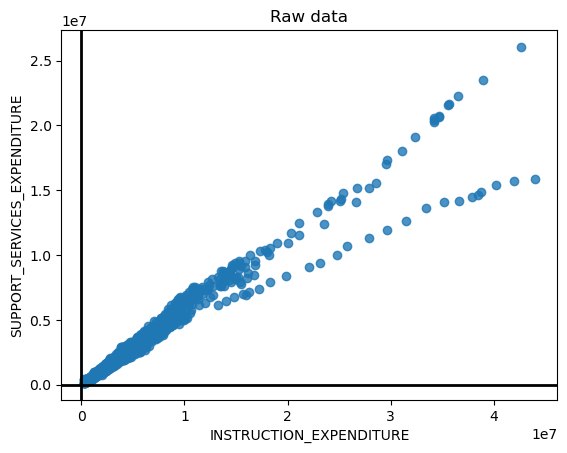

In [23]:

import seaborn as sns
t = sns.regplot(
    x='INSTRUCTION_EXPENDITURE',
    y='SUPPORT_SERVICES_EXPENDITURE',
    data=ed_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

In [35]:

pca = PCA(n_components=1)
df=ed_df[['INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE',	'OTHER_EXPENDITURE',	'CAPITAL_OUTLAY_EXPENDITURE']]
pca2= pca.fit(df)
print(pca.components_)
print(pca.explained_variance_)

[[0.87033259 0.45832126 0.06663878 0.16739794]]
[4.47138818e+13]


In [39]:
ed_df['pca1']  = pd.DataFrame(pca2.transform(df), columns=['pca1'], index=df.index)
ed_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_score,avg_score2,avg_mr_score,pca1
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,196386.0,676174.0,208.327876,252.187522,207.963517,263.661132,230.272259,235.830815,233.051537,-3.869346e+06
1,1992_ALASKA,ALASKA,1992,915930.820993,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,30847.0,112335.0,234.768293,278.414711,218.866154,258.859712,255.462492,237.828412,246.645452,-4.924103e+06
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,238.787277,232.490863,235.639070,-3.711392e+06
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,233.709070,237.173496,235.441283,-4.439756e+06
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.661132,232.794841,227.854186,230.324513,1.121970e+07


In [42]:
ed_df[['INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE',	'OTHER_EXPENDITURE',	'CAPITAL_OUTLAY_EXPENDITURE','avg_mr_score','pca1']].corr()

,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,avg_mr_score,pca1
INSTRUCTION_EXPENDITURE,1.000000,0.976889,0.902964,0.896103,0.075448,0.998509
SUPPORT_SERVICES_EXPENDITURE,0.976889,1.000000,0.945724,0.917782,0.072963,0.986770
OTHER_EXPENDITURE,0.902964,0.945724,1.000000,0.916854,0.010777,0.919370
CAPITAL_OUTLAY_EXPENDITURE,0.896103,0.917782,0.916854,1.000000,0.025506,0.910375
avg_mr_score,0.075448,0.072963,0.010777,0.025506,1.000000,0.073605
pca1,0.998509,0.986770,0.919370,0.910375,0.073605,1.000000


In [ ]:
# lot of correlation is preseved 

In [44]:
tdf = pd.read_sql_query('select * from useducation',con=engine2)

In [45]:
tdf.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
